# Analyzing Survival Rates on basis of gender, class and age.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Performing EDA

In [2]:
df=pd.read_csv("tested.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [3]:
df.dtypes  #no strings so ok

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Removing cols that is not required

In [4]:
df=df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Embarked'], axis=1)
display(df)

,Survived,Pclass,Sex,Age
0,0,3,male,34.5
1,1,3,female,47.0
2,0,2,male,62.0
3,0,3,male,27.0
4,1,3,female,22.0
...,...,...,...,...
413,0,3,male,NaN
414,1,1,female,39.0
415,0,3,male,38.5
416,0,3,male,NaN


In [5]:
df.shape

(418, 4)

In [6]:
#removing duplicate rows
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(224, 4)


In [7]:
df.count()

Survived    418
Pclass      418
Sex         418
Age         332
dtype: int64

In [8]:
df = df.drop_duplicates()
df.head(5)

,Survived,Pclass,Sex,Age
0,0,3,male,34.5
1,1,3,female,47.0
2,0,2,male,62.0
3,0,3,male,27.0
4,1,3,female,22.0


In [9]:
df.count()

Survived    194
Pclass      194
Sex         194
Age         188
dtype: int64

In [10]:
# dropping null values
print(df.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         6
dtype: int64


In [11]:
df = df.dropna()
df.count()

Survived    188
Pclass      188
Sex         188
Age         188
dtype: int64

In [20]:
print(df.isnull().sum())
print(df.head)

Survived    0
Pclass      0
Age         0
dtype: int64
<bound method NDFrame.head of      Survived  Pclass   Age
0           0       3  34.5
1           1       3  47.0
2           0       2  62.0
3           0       3  27.0
4           1       3  22.0
..        ...     ...   ...
405         0       2  20.0
409         1       3   3.0
411         1       1  37.0
412         1       3  28.0
415         0       3  38.5

[187 rows x 3 columns]>


### Outliers

<Axes: xlabel='Age'>

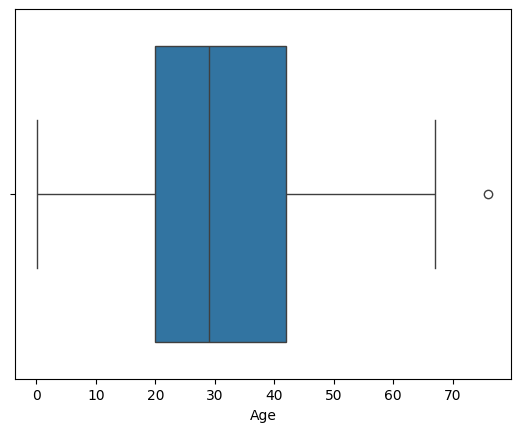

In [13]:
import seaborn as sns
sns.boxplot(x=df['Age']) #using boxplot to see Age outlier

In [17]:
numeric_df = df.select_dtypes(include="number")

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Survived     1.0
Pclass       2.0
Age         22.0
dtype: float64


In [19]:
# removing that outlier shown in boxplot

df = numeric_df[~((numeric_df < (Q1 - 1.5 * IQR)) |(numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(187, 3)

### since this data dont have too much of numbers dont need any histograms, scatter plots or heat map

In [ ]:
df.to_csv('eda_titanic.csv', index=False) 